# Create Land-Sea Make

In [57]:
import os

import numpy as np
import xarray as xr
import matplotlib.pyplot as plot
import sys

In [59]:
sys.path.append(os.path.join(os.getcwd(), 'PhD'))

import constants

In [45]:
base_path = '/g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/1pctCO2-bgc/r3i1p1f1/Emon/cLand/gn/v20190710' 
os.listdir(base_path)

['cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_187001-188912.nc',
 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_191001-192912.nc',
 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_193001-194912.nc',
 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_195001-196912.nc',
 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_189001-190912.nc',
 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_197001-198912.nc',
 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_185001-186912.nc']

In [28]:
ds = xr.open_dataset(os.path.join(base_path, 'cLand_Emon_MPI-ESM1-2-LR_1pctCO2-bgc_r3i1p1f1_gn_187001-188912.nc')); ds

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lat: 96, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 1870-01-16T12:00:00 ... 1889-12-16T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    cLand      (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            C4MIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36524.0
    contact:                cmip6-mpi-esm@dkrz.de
    ...                     ...
    title:                  MPI-ESM1-2-LR output prepared for CMIP6
    variable_id:            cLand
    variant_label:          r3i1p1f1
    license:                CMIP6 model data produced by MPI-M is licensed un...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/ef27152f-c596-499a-a761-179fddd38de6

In [74]:
ds_mask = xr.where(np.isfinite(ds.isel(time=0).squeeze().drop('time').cLand), 1, 0)
ds_mask = ds_mask.to_dataset(name='mask')

In [75]:
ds_mask.attrs = {'Original model': f'Made from data found at {base_path}'}
ds_mask.attrs

{'Original model': 'Made from data found at /g/data/oi10/replicas/CMIP6/C4MIP/MPI-M/MPI-ESM1-2-LR/1pctCO2-bgc/r3i1p1f1/Emon/cLand/gn/v20190710'}

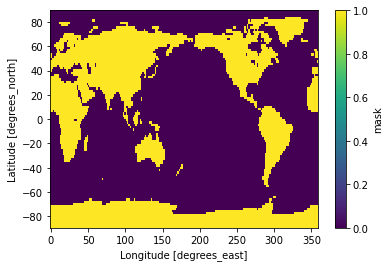

In [76]:
ds_mask.mask.plot()

In [77]:
constants.ZECMIP_LOCAL_REGRIDDED_DIR

'/g/data/w40/ab2313/PhD/zecmip/regridded'

In [78]:
ds_mask.to_netcdf(os.path.join(constants.ZECMIP_LOCAL_REGRIDDED_DIR, 'landsea_mask.nc'))